## Лабораторная работа № 13. Обработка данных для машинного обучения.
### (Валяев Георгий, ПИ20-6)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fasteda import fast_eda # визуализация всевозможных признаков датасетов и отображение главной информации о них
from typing import Tuple, Union
from tqdm.notebook import tqdm

### Задания для выполнения

In [ ]:
!pip install fasteda

##### 1. На сайте [https://www.kaggle.com/datasets](https://www.kaggle.com/datasets) выбрать набор данных каждому студенту индивидуально. Лучше всего выбирать датасеты в предметной области исходя из личных предпочтений. Не стоит выбирать слишком большие наборы данных (лучше не более 100 Мб).

###### Остановился на следующем датасете: https://www.kaggle.com/datasets/ashishmotwani/fifa-world-cup-2022
###### Краткое описание — полная статистика всех прошедших матчей Чемпионата Мира по футболу 2022 года в Катаре

###### Поля датасета
###### match — порядковый номер матча на ЧМ 2022
###### team1, team2 — название команд хозяев и гостей (1 и 2 команды матча)
###### score — результат матча
###### date — дата матча
###### attendance — количество зрителей матча на стадионе
###### venue — название стадиона, на котором был матч
###### referee — ФИ судьи матча
###### team1_captain, team2_captain — капитаны команд
###### team1_manager, team2_manager — менеджеры (тренеры) команд
###### team1_possession, team2_possession — проценты владения мячом у команд
###### team1_completed_passes, team2_completed_passes — число отданных пасов у команд
###### team1_attempted_passes, team2_attempted_passes — число точных пасов у команд
###### team1_shots_on_target, team2_shots_on_target — число ударов в створ у команд
###### team1_total_shots, team2_total_shots — общее число ударов у команд
###### team1_saves, team2_saves — число сейвов у вратарей команд
###### team1_fouls, team2_fouls — число фолов у команд
###### team1_corners, team2_corners — число угловых ударов у команд
###### team1_crosses, team2_crosses — число переходов на сторону противника у команд
###### team1_tackles, team2_tackles — число отборов мяча у команд
###### team1_interceptions, team2_interceptions — число перехватов мяча у команд
###### team1_aerials_won, team2_aerials_won — число выигранных воздушных дуэлей у команд
###### team1_offsides, team2_offsides — число офсайдов у команд
###### penalties_scored_team1, penalties_scored_team2 — число реализованных пенальти у команд
###### free_kicks_team1, free_kicks_team2 — число нарушений у команд
###### yellow_cards_team1, yellow_cards_team2 — число жёлтых карточек у команд
###### red_cards_team1, red_cards_team2 — число красных карточек у команд

In [88]:
dataframe = pd.read_csv('data/world_cup_data.csv', parse_dates=['date', 'attendance'])[:-3]

In [89]:
for column in tqdm([dataframe.columns[8]] + list(dataframe.columns[15:])):
    data = pd.Series([int(elem) for elem in dataframe[column]])
    dataframe[column] = data

  0%|          | 0/37 [00:00<?, ?it/s]

In [90]:
dataframe.columns

Index(['match', 'team1', 'team2', 'team1_xg', 'team2_xg', 'score', 'xg_score',
       'date', 'attendance', 'venue', 'referee', 'team1_captain',
       'team2_captain', 'team1_manager', 'team2_manager', 'team1_possession',
       'team2_possession', 'team1_completed_passes', 'team1_attempted_pases',
       'team2_completed_passes', 'team2_attempted_pases',
       'team1_shots_on_target', 'team2_shots_on_target', 'team1_total_shots',
       'team2_total_shots', 'team1_saves', 'team2_saves', 'team1_fouls',
       'team2_fouls', 'team1_corners', 'team2_corners', 'team1_crosses',
       'team2_crosses', 'team1_tackles', 'team2_tackles',
       'team1_interceptions', 'team2_interceptions', 'team1_aerials_won',
       'team2_aerials_won', 'team1_clearances', 'team2_clearances',
       'team1_offsides', 'team2_offsides', 'penalties scored team1',
       'penalties scored team2', 'free kicks team1', 'free kicks team2',
       'yellow cards team1', 'yellow cards team2', 'red cards team1',
     

In [91]:
dataframe = dataframe.drop(['match', 'team1_xg', 'team2_xg', 'xg_score', 'team1_clearances', 'team2_clearances'], axis=1)
dataframe

,team1,team2,score,date,attendance,venue,referee,team1_captain,team2_captain,team1_manager,...,team1_offsides,team2_offsides,penalties scored team1,penalties scored team2,free kicks team1,free kicks team2,yellow cards team1,yellow cards team2,red cards team1,red cards team2
0,Qatar,Ecuador,0-2,2022-11-20,67372,Al Bayt Stadium,Daniele Orsato,Hassan Al-Haydos,Enner Valencia,FÃ©lix SÃ¡nchez,...,3,4,0,1,19,17,4,2,0,0
1,England,IR Iran,6-2,2022-11-21,45334,Khalifa International Stadium,Raphael Claus,Harry Kane,Ehsan Hajsafi,Gareth Southgate,...,2,2,0,1,16,10,0,2,0,0
2,Senegal,Netherlands,0-2,2022-11-21,41721,Al Thumama Stadium,Wilton Sampaio,Kalidou Koulibaly,Virgil van Dijk,Aliou CissÃ©,...,2,1,0,0,14,14,2,1,0,0
3,United States,Wales,1-1,2022-11-21,43418,Ahmed bin Ali Stadium,Abdulrahman Ibrahim Al Jassim,Tyler Adams,Gareth Bale,Gregg Berhalter,...,1,1,0,1,11,15,4,2,0,0
4,Argentina,Saudi Arabia,1-2,2022-11-22,88012,Lusail Iconic Stadium,Slavko VinÄiÄ,Lionel Messi,Salman Al-Faraj,Lionel Scaloni,...,10,1,1,0,22,16,0,6,0,0
5,Denmark,Tunisia,0-0,2022-11-22,42925,Education City Stadium,CÃ©sar Arturo Ramos,Simon Kjaer,Youssef Msakni,Kasper Hjulmand,...,1,1,0,0,11,10,2,1,0,0
6,Mexico,Poland,0-0,2022-11-22,39369,Stadium 974,Chris Beath,Guillermo Ochoa,Robert Lewandowski,Tata Martino,...,3,0,0,0,16,16,2,1,0,0
7,France,Australia,4-1,2022-11-22,40875,Al Janoub Stadium,Victor Gomes,Hugo Lloris,Mathew Ryan,Didier Deschamps,...,0,0,0,0,11,5,0,3,0,0
8,Morocco,Croatia,0-0,2022-11-23,59407,Al Bayt Stadium,Fernando Rapallini,Romain Saiss,Luka Modric,Hoalid Regragui,...,0,1,0,0,12,17,1,0,0,0
9,Germany,Japan,1-2,2022-11-23,42608,Khalifa International Stadium,IvÃ¡n Barton,Manuel Neuer,Maya Yoshida,Hansi Flick,...,4,4,1,0,17,10,0,0,0,0


In [92]:
dataframe.dtypes

team1                             object
team2                             object
score                             object
date                      datetime64[ns]
attendance                         int64
venue                             object
referee                           object
team1_captain                     object
team2_captain                     object
team1_manager                     object
team2_manager                     object
team1_possession                   int64
team2_possession                   int64
team1_completed_passes             int64
team1_attempted_pases              int64
team2_completed_passes             int64
team2_attempted_pases              int64
team1_shots_on_target              int64
team2_shots_on_target              int64
team1_total_shots                  int64
team2_total_shots                  int64
team1_saves                        int64
team2_saves                        int64
team1_fouls                        int64
team2_fouls     

##### 2. В начале анализа следует привести общую характеристику набора данных: количество наблюдений, признаков, предметная область, содержание признаков, характер целевой переменной, задача обучения (регрессия, классификация, количество классов).

In [93]:
dataframe.shape

(60, 45)

In [94]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   team1                   60 non-null     object        
 1   team2                   60 non-null     object        
 2   score                   60 non-null     object        
 3   date                    60 non-null     datetime64[ns]
 4   attendance              60 non-null     int64         
 5   venue                   60 non-null     object        
 6   referee                 60 non-null     object        
 7   team1_captain           60 non-null     object        
 8   team2_captain           60 non-null     object        
 9   team1_manager           60 non-null     object        
 10  team2_manager           60 non-null     object        
 11  team1_possession        60 non-null     int64         
 12  team2_possession        60 non-null     int64       

In [95]:
dataframe.describe()

,attendance,team1_possession,team2_possession,team1_completed_passes,team1_attempted_pases,team2_completed_passes,team2_attempted_pases,team1_shots_on_target,team2_shots_on_target,team1_total_shots,...,team1_offsides,team2_offsides,penalties scored team1,penalties scored team2,free kicks team1,free kicks team2,yellow cards team1,yellow cards team2,red cards team1,red cards team2
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0
mean,51898.150000,51.233333,48.766667,447.083333,548.350000,423.683333,525.200000,3.983333,3.516667,10.983333,...,1.933333,1.966667,0.116667,0.100000,14.133333,14.033333,1.750000,1.700000,0.050000,0.0
std,16192.926981,12.989392,12.989392,159.279872,158.786481,169.516510,173.732485,2.425092,2.683861,4.979591,...,1.755057,1.726824,0.323732,0.302532,4.114739,5.075587,1.590491,1.499152,0.219784,0.0
min,39089.000000,18.000000,19.000000,165.000000,245.000000,162.000000,248.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,0.000000,0.000000,0.000000,0.0
25%,42051.000000,42.000000,40.000000,332.750000,424.500000,315.000000,412.000000,2.750000,1.750000,7.750000,...,1.000000,1.000000,0.000000,0.000000,11.000000,10.000000,0.750000,1.000000,0.000000,0.0
50%,43983.500000,53.500000,46.500000,453.000000,561.500000,389.000000,487.500000,4.000000,3.000000,10.000000,...,2.000000,2.000000,0.000000,0.000000,14.500000,14.000000,1.500000,1.500000,0.000000,0.0
75%,61051.500000,60.000000,58.000000,532.250000,630.750000,499.500000,601.250000,6.000000,5.000000,13.250000,...,3.000000,3.000000,0.000000,0.000000,16.000000,17.000000,3.000000,2.000000,0.000000,0.0
max,88966.000000,81.000000,82.000000,1009.000000,1093.000000,995.000000,1106.000000,10.000000,11.000000,25.000000,...,10.000000,7.000000,1.000000,1.000000,27.000000,30.000000,7.000000,8.000000,1.000000,0.0


In [96]:
dataframe.isnull().sum()

team1                     0
team2                     0
score                     0
date                      0
attendance                0
venue                     0
referee                   0
team1_captain             0
team2_captain             0
team1_manager             0
team2_manager             0
team1_possession          0
team2_possession          0
team1_completed_passes    0
team1_attempted_pases     0
team2_completed_passes    0
team2_attempted_pases     0
team1_shots_on_target     0
team2_shots_on_target     0
team1_total_shots         0
team2_total_shots         0
team1_saves               0
team2_saves               0
team1_fouls               0
team2_fouls               0
team1_corners             0
team2_corners             0
team1_crosses             0
team2_crosses             0
team1_tackles             0
team2_tackles             0
team1_interceptions       0
team2_interceptions       0
team1_aerials_won         0
team2_aerials_won         0
team1_offsides      

In [97]:
dataframe.nunique()

team1                     32
team2                     32
score                     24
date                      19
attendance                58
venue                      8
referee                   29
team1_captain             35
team2_captain             39
team1_manager             33
team2_manager             32
team1_possession          35
team2_possession          35
team1_completed_passes    57
team1_attempted_pases     56
team2_completed_passes    56
team2_attempted_pases     53
team1_shots_on_target     11
team2_shots_on_target     10
team1_total_shots         19
team2_total_shots         21
team1_saves                9
team2_saves                9
team1_fouls               20
team2_fouls               16
team1_corners             12
team2_corners             12
team1_crosses             25
team2_crosses             25
team1_tackles             19
team2_tackles             21
team1_interceptions       15
team2_interceptions       13
team1_aerials_won         19
team2_aerials_

###### Всего 60 наблюдений (матчей ЧМ 2022), 46 факторов (характеристик матча)

###### Предметная область — футбольные матчи Чемпионата Мира 2022 в Катаре: датасет сам по себе содержит много интересных данных, но нас интересует активность игры команд, которые встретятся в финале 18 декабря — Аргентина и Франция. Для этого проанализируем их активность, их футбол на протяжении всего чемпионата

###### Задача, которая стоит перед будущей моделью — предсказать, кто забьёт первым в матче финала, Аргентина или Франция?

###### Рассматриваемая задача является задачей бинарной классификации

In [98]:
df_france = dataframe[dataframe['team1'] == 'France'].append(dataframe[dataframe['team2'] == 'France'])
df_argentina = dataframe[dataframe['team1'] == 'Argentina'].append(dataframe[dataframe['team2'] == 'Argentina'])
df_france

,team1,team2,score,date,attendance,venue,referee,team1_captain,team2_captain,team1_manager,...,team1_offsides,team2_offsides,penalties scored team1,penalties scored team2,free kicks team1,free kicks team2,yellow cards team1,yellow cards team2,red cards team1,red cards team2
7,France,Australia,4-1,2022-11-22,40875,Al Janoub Stadium,Victor Gomes,Hugo Lloris,Mathew Ryan,Didier Deschamps,...,0,0,0,0,11,5,0,3,0,0
22,France,Denmark,2-1,2022-11-26,42860,Stadium 974,Szymon Marciniak,Hugo Lloris,Kasper Schmeichel,Didier Deschamps,...,1,1,0,0,10,5,1,2,0,0
50,France,Poland,3-1,2022-12-04,40989,Al Thumama Stadium,JesÃºs Valenzuela,Hugo Lloris,Robert Lewandowski,Didier Deschamps,...,3,1,0,1,8,11,1,2,0,0
37,Tunisia,France,1-0,2022-11-30,43627,Education City Stadium,Matt Conger,Wahbi Khazri,RaphaÃ«l Varane,Jalel Kadri,...,3,2,0,0,8,17,1,0,0,0
59,England,France,1-2,2022-12-10,68895,Al Bayt Stadium,Wilton Sampaio,Harry Kane,Hugo Lloris,Gareth Southgate,...,1,2,1,0,10,14,1,3,0,0


In [99]:
df_argentina

,team1,team2,score,date,attendance,venue,referee,team1_captain,team2_captain,team1_manager,...,team1_offsides,team2_offsides,penalties scored team1,penalties scored team2,free kicks team1,free kicks team2,yellow cards team1,yellow cards team2,red cards team1,red cards team2
4,Argentina,Saudi Arabia,1-2,2022-11-22,88012,Lusail Iconic Stadium,Slavko VinÄiÄ,Lionel Messi,Salman Al-Faraj,Lionel Scaloni,...,10,1,1,0,22,16,0,6,0,0
23,Argentina,Mexico,2-0,2022-11-26,88966,Lusail Iconic Stadium,Daniele Orsato,Lionel Messi,AndrÃ©s Guardado,Lionel Scaloni,...,2,4,0,0,23,17,1,4,0,0
49,Argentina,Australia,2-1,2022-12-03,45032,Ahmed bin Ali Stadium,Szymon Marciniak,Lionel Messi,Mathew Ryan,Lionel Scaloni,...,3,0,0,0,15,11,0,2,0,0
39,Poland,Argentina,0-2,2022-11-30,44089,Stadium 974,Danny Makkelie,Robert Lewandowski,Lionel Messi,CzesÅ‚aw Michniewicz,...,0,1,0,0,23,22,6,1,0,0
57,Netherlands,Argentina,(3) 2-2 (4),2022-12-09,88235,Lusail Iconic Stadium,Antonio MatÃ©u,Virgil van Dijk,Lionel Messi,Louis van Gaal,...,1,2,0,1,20,30,4,8,0,0


###### Наша целевая переменная — количество ударов в створ ворот (shots_on_target)

In [100]:
set(df_france[df_france['team1'] == 'France']['team1_shots_on_target'].append(df_france[df_france['team2'] == 'France']['team2_shots_on_target']).unique())

{3, 5, 6, 8}

In [101]:
set(df_argentina[df_argentina['team1'] == 'Argentina']['team1_shots_on_target'].append(df_argentina[df_argentina['team2'] == 'Argentina']['team2_shots_on_target']).unique())

{2, 4, 5, 10}

In [102]:
df_france[df_france['team1'] == 'France']['team1_shots_on_target'].append(df_france[df_france['team2'] == 'France']['team2_shots_on_target']).value_counts()

6    2
8    1
3    1
5    1
dtype: int64

In [103]:
df_argentina[df_argentina['team1'] == 'Argentina']['team1_shots_on_target'].append(df_argentina[df_argentina['team2'] == 'Argentina']['team2_shots_on_target']).value_counts()

5     2
2     1
10    1
4     1
dtype: int64

##### Рассмотрим категориальные признаки датасетов команд

In [104]:
categ = [i for i in df_france.columns if df_france[i].dtypes == 'O']
categ

['team1',
 'team2',
 'score',
 'venue',
 'referee',
 'team1_captain',
 'team2_captain',
 'team1_manager',
 'team2_manager']

In [105]:
for item in categ:
    print(f"{item} -> {len(set(df_france[item].unique()))}")

team1 -> 3
team2 -> 4
score -> 5
venue -> 5
referee -> 5
team1_captain -> 3
team2_captain -> 5
team1_manager -> 3
team2_manager -> 4


###### Удаляем бесполезные категориальные признаки

In [106]:
df_france = df_france.drop(['venue', 'referee', 'team1_captain', 'team2_captain', 'team1_manager', 'team2_manager'], axis=1)
df_france

,team1,team2,score,date,attendance,team1_possession,team2_possession,team1_completed_passes,team1_attempted_pases,team2_completed_passes,...,team1_offsides,team2_offsides,penalties scored team1,penalties scored team2,free kicks team1,free kicks team2,yellow cards team1,yellow cards team2,red cards team1,red cards team2
7,France,Australia,4-1,2022-11-22,40875,62,38,678,768,391,...,0,0,0,0,11,5,0,3,0,0
22,France,Denmark,2-1,2022-11-26,42860,49,51,455,539,485,...,1,1,0,0,10,5,1,2,0,0
50,France,Poland,3-1,2022-12-04,40989,55,45,501,601,401,...,3,1,0,1,8,11,1,2,0,0
37,Tunisia,France,1-0,2022-11-30,43627,35,65,272,368,573,...,3,2,0,0,8,17,1,0,0,0
59,England,France,1-2,2022-12-10,68895,57,43,463,543,325,...,1,2,1,0,10,14,1,3,0,0


In [107]:
df_argentina = df_argentina.drop(['venue', 'referee', 'team1_captain', 'team2_captain', 'team1_manager', 'team2_manager'], axis=1)
df_argentina

,team1,team2,score,date,attendance,team1_possession,team2_possession,team1_completed_passes,team1_attempted_pases,team2_completed_passes,...,team1_offsides,team2_offsides,penalties scored team1,penalties scored team2,free kicks team1,free kicks team2,yellow cards team1,yellow cards team2,red cards team1,red cards team2
4,Argentina,Saudi Arabia,1-2,2022-11-22,88012,69,31,546,659,195,...,10,1,1,0,22,16,0,6,0,0
23,Argentina,Mexico,2-0,2022-11-26,88966,58,42,471,568,304,...,2,4,0,0,23,17,1,4,0,0
49,Argentina,Australia,2-1,2022-12-03,45032,60,40,635,729,384,...,3,0,0,0,15,11,0,2,0,0
39,Poland,Argentina,0-2,2022-11-30,44089,27,73,264,341,827,...,0,1,0,0,23,22,6,1,0,0
57,Netherlands,Argentina,(3) 2-2 (4),2022-12-09,88235,52,48,572,701,526,...,1,2,0,1,20,30,4,8,0,0


##### 3. Провести в Jupyter средствами pandas, sklearn, seaborn описательный анализ выбранного набора включающего (но не ограниченного) следующие шаги:
    1. исследование шкалы измерения каждого существенного признака;
    2. построение эмпирического распределения каждого существенного признака;
    3. анализ количества и распределения отсутствующих значений;
    4. построение совместного распределения каждого признака и целевой переменной;
    5. построение корреляционной матрицы.

In [108]:
def process_data_country(df, country):
    part_1 = df[df['team1'] == country].drop(['team2', 'team2_possession', 'team2_completed_passes', 'team2_attempted_pases', 'team2_shots_on_target', 'team2_total_shots', 'team2_saves', 'team2_fouls', 'team2_corners', 'team2_crosses', 'team2_tackles', 'team2_interceptions', 'team2_aerials_won', 'team2_offsides', 'penalties scored team2', 'free kicks team2', 'yellow cards team2', 'red cards team2'], axis=1)
    part_1_score = [elem.split('-') for elem in part_1['score']]
    part_1_is_win = [1 if elem_score[0] > elem_score[1] else 0 for elem_score in part_1_score]
    part_1.insert(2, 'is_win', part_1_is_win)

    part_1.rename(columns = {'team1': 'team', 'team1_possession': 'possession', 'team1_completed_passes': 'completed_passes', 'team1_attempted_pases': 'attempted_pases', 'team1_shots_on_target': 'shots_on_target', 'team1_total_shots': 'total_shots', 'team1_saves': 'saves', 'team1_fouls': 'fouls', 'team1_corners': 'corners', 'team1_crosses': 'crosses', 'team1_tackles': 'tackles', 'team1_interceptions': 'interceptions', 'team1_aerials_won': 'aerials_won', 'team1_offsides': 'offsides', 'penalties scored team1': 'penalties_scored', 'free kicks team1': 'free_kicks', 'yellow cards team1': 'yellow_cards', 'red cards team1': 'red_cards'}, inplace=True)

    part_2 = df[df['team2'] == country].drop(['team1', 'team1_possession', 'team1_completed_passes', 'team1_attempted_pases', 'team1_shots_on_target', 'team1_total_shots', 'team1_saves', 'team1_fouls', 'team1_corners', 'team1_crosses', 'team1_tackles', 'team1_interceptions', 'team1_aerials_won', 'team1_offsides', 'penalties scored team1', 'free kicks team1', 'yellow cards team1', 'red cards team1'], axis=1)
    part_2_score = [elem.split('-') for elem in part_2['score']]
    part_2_is_win = [1 if elem_score[1] > elem_score[0] else 0 for elem_score in part_2_score]
    part_2.insert(2, 'is_win', part_2_is_win)

    part_2.rename(columns = {'team2': 'team', 'team2_possession': 'possession', 'team2_completed_passes': 'completed_passes', 'team2_attempted_pases': 'attempted_pases', 'team2_shots_on_target': 'shots_on_target', 'team2_total_shots': 'total_shots', 'team2_saves': 'saves', 'team2_fouls': 'fouls', 'team2_corners': 'corners', 'team2_crosses': 'crosses', 'team2_tackles': 'tackles', 'team2_interceptions': 'interceptions', 'team2_aerials_won': 'aerials_won', 'team2_offsides': 'offsides', 'penalties scored team2': 'penalties_scored', 'free kicks team2': 'free_kicks', 'yellow cards team2': 'yellow_cards', 'red cards team2': 'red_cards'}, inplace=True)

    return part_1.append(part_2)

df_france = process_data_country(df_france, 'France')
df_argentina = process_data_country(df_argentina, 'Argentina')
df_france

,team,score,is_win,date,attendance,possession,completed_passes,attempted_pases,shots_on_target,total_shots,...,corners,crosses,tackles,interceptions,aerials_won,offsides,penalties_scored,free_kicks,yellow_cards,red_cards
7,France,4-1,1,2022-11-22,40875,62,678,768,6,23,...,8,27,20,12,16,0,0,11,0,0
22,France,2-1,1,2022-11-26,42860,49,455,539,6,21,...,6,20,20,10,9,1,0,10,1,0
50,France,3-1,1,2022-12-04,40989,55,501,601,8,16,...,7,25,11,9,12,3,0,8,1,0
37,France,1-0,0,2022-11-30,43627,65,573,676,3,10,...,8,19,37,13,13,2,0,17,0,0
59,France,1-2,1,2022-12-10,68895,43,325,409,5,8,...,2,11,10,5,19,2,0,14,3,0


In [109]:
df_argentina

,team,score,is_win,date,attendance,possession,completed_passes,attempted_pases,shots_on_target,total_shots,...,corners,crosses,tackles,interceptions,aerials_won,offsides,penalties_scored,free_kicks,yellow_cards,red_cards
4,Argentina,1-2,0,2022-11-22,88012,69,546,659,5,14,...,9,23,17,9,16,10,1,22,0,0
23,Argentina,2-0,1,2022-11-26,88966,58,471,568,2,5,...,4,13,14,7,15,2,0,23,1,0
49,Argentina,2-1,1,2022-12-03,45032,60,635,729,5,14,...,1,5,15,7,13,3,0,15,0,0
39,Argentina,0-2,1,2022-11-30,44089,73,827,911,10,22,...,9,18,13,5,12,1,0,22,1,0
57,Argentina,(3) 2-2 (4),1,2022-12-09,88235,48,526,642,4,13,...,8,12,19,6,12,2,1,30,8,0


In [110]:
num = [i for i in df_france.columns if df_france[i].dtypes != 'O']
num

['is_win',
 'date',
 'attendance',
 'possession',
 'completed_passes',
 'attempted_pases',
 'shots_on_target',
 'total_shots',
 'saves',
 'fouls',
 'corners',
 'crosses',
 'tackles',
 'interceptions',
 'aerials_won',
 'offsides',
 'penalties_scored',
 'free_kicks',
 'yellow_cards',
 'red_cards']

##### Исследование шкалы измерения

In [111]:
def scale_values_getter(value: pd.Series) -> Tuple[np.dtype, int, Union[int, str], Union[int, str], list]:

    uniq_values = sorted(value.dropna().unique())
    shape_value = len(uniq_values)
    min_value = pd.Series(uniq_values).dropna().min()
    max_value = pd.Series(uniq_values).dropna().max()

    #Если категориальный признак-строка - нет смысла искать max/min
    if value.dtype == object:
        min_value, max_value = "-"*2

    return value.dtype, shape_value, min_value, max_value, uniq_values

res_france, res_argentina = df_france.apply(scale_values_getter).transpose(), df_argentina.apply(scale_values_getter).transpose()
res_france.columns, res_argentina.columns = ["type","shape","min_value", "max_value", "uniq_values"], ["type","shape","min_value", "max_value", "uniq_values"]
res_france

,type,shape,min_value,max_value,uniq_values
team,object,1,-,-,[France]
score,object,5,-,-,"[1-0, 1-2, 2-1, 3-1, 4-1]"
is_win,int64,2,0,1,"[0, 1]"
date,datetime64[ns],5,2022-11-22 00:00:00,2022-12-10 00:00:00,"[2022-11-22T00:00:00.000000000, 2022-11-26T00:..."
attendance,int64,5,40875,68895,"[40875, 40989, 42860, 43627, 68895]"
possession,int64,5,43,65,"[43, 49, 55, 62, 65]"
completed_passes,int64,5,325,678,"[325, 455, 501, 573, 678]"
attempted_pases,int64,5,409,768,"[409, 539, 601, 676, 768]"
shots_on_target,int64,4,3,8,"[3, 5, 6, 8]"
total_shots,int64,5,8,23,"[8, 10, 16, 21, 23]"


In [112]:
res_argentina

,type,shape,min_value,max_value,uniq_values
team,object,1,-,-,[Argentina]
score,object,5,-,-,"[(3) 2-2 (4), 0-2, 1-2, 2-0, 2-1]"
is_win,int64,2,0,1,"[0, 1]"
date,datetime64[ns],5,2022-11-22 00:00:00,2022-12-09 00:00:00,"[2022-11-22T00:00:00.000000000, 2022-11-26T00:..."
attendance,int64,5,44089,88966,"[44089, 45032, 88012, 88235, 88966]"
possession,int64,5,48,73,"[48, 58, 60, 69, 73]"
completed_passes,int64,5,471,827,"[471, 526, 546, 635, 827]"
attempted_pases,int64,5,568,911,"[568, 642, 659, 729, 911]"
shots_on_target,int64,4,2,10,"[2, 4, 5, 10]"
total_shots,int64,4,5,22,"[5, 13, 14, 22]"


##### Построение эмпирического распределения каждого существенного признака

In [113]:
num

['is_win',
 'date',
 'attendance',
 'possession',
 'completed_passes',
 'attempted_pases',
 'shots_on_target',
 'total_shots',
 'saves',
 'fouls',
 'corners',
 'crosses',
 'tackles',
 'interceptions',
 'aerials_won',
 'offsides',
 'penalties_scored',
 'free_kicks',
 'yellow_cards',
 'red_cards']

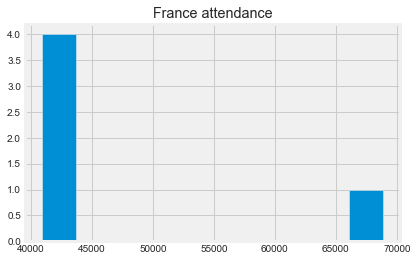

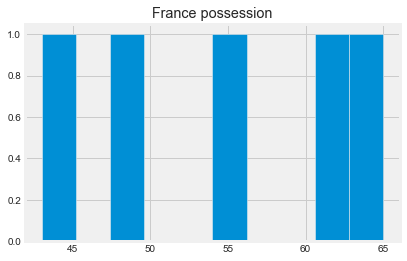

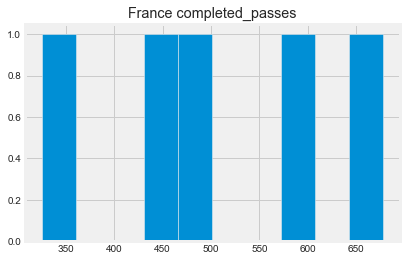

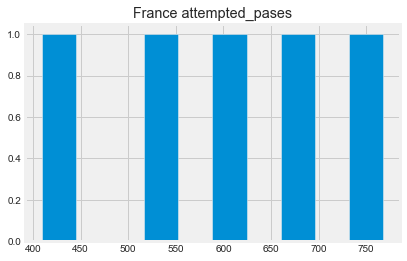

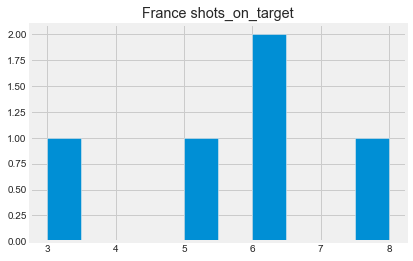

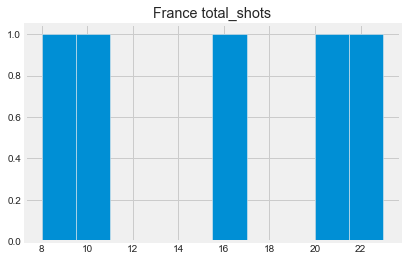

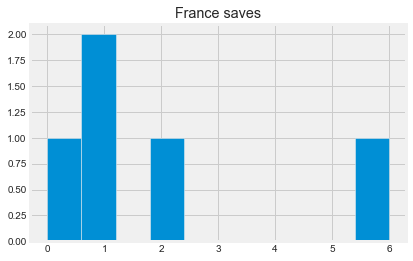

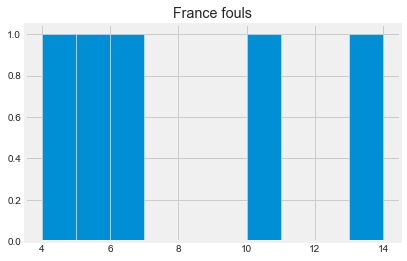

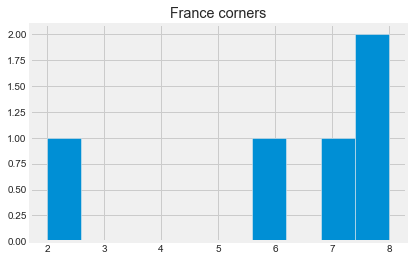

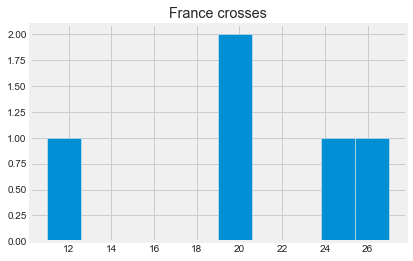

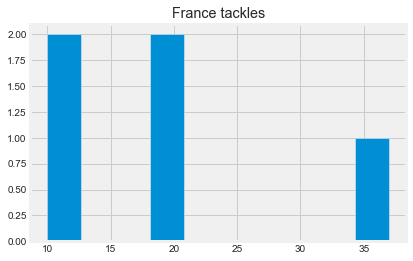

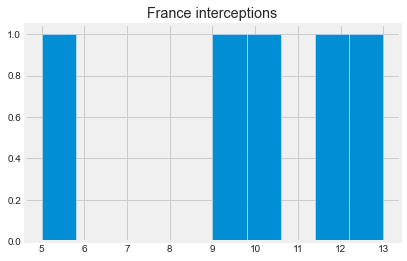

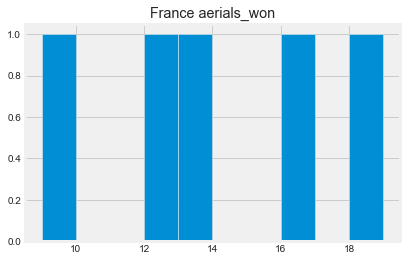

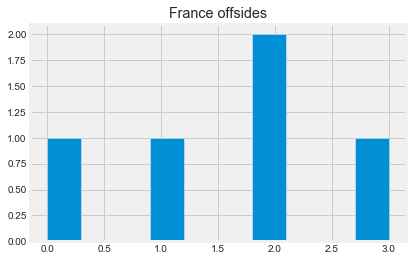

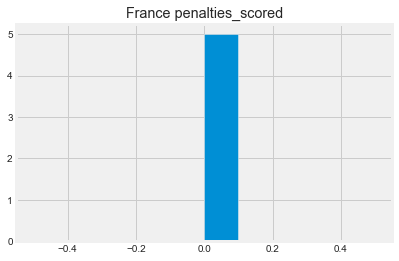

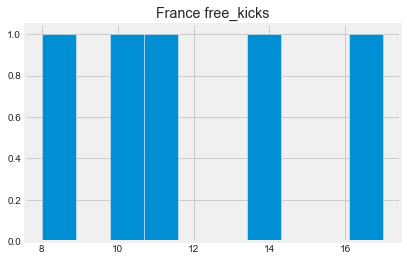

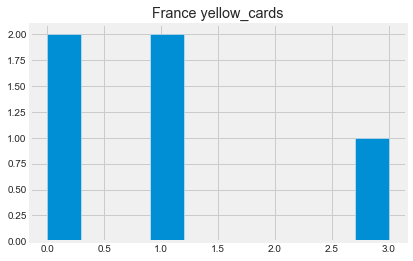

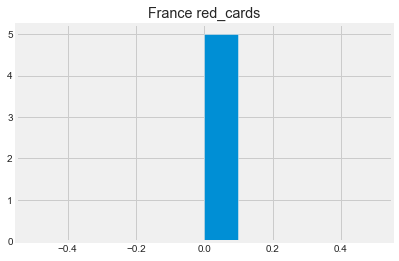

In [114]:
for column in num[2:]:
    plt.hist(df_france[column])
    plt.title('France ' + column)
    plt.show()

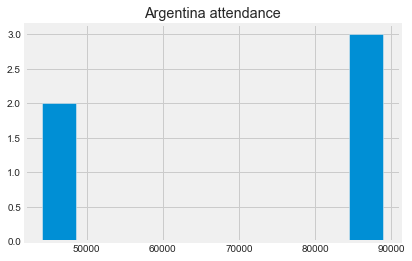

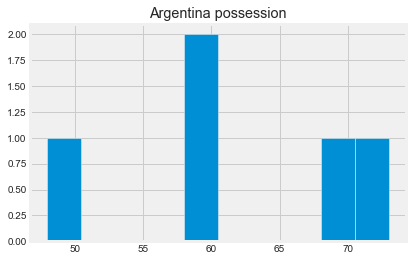

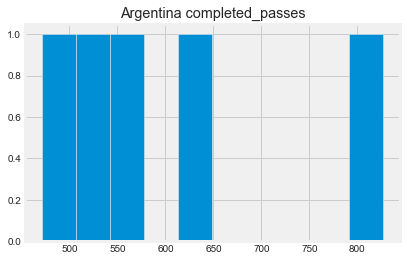

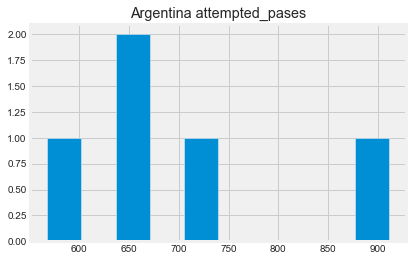

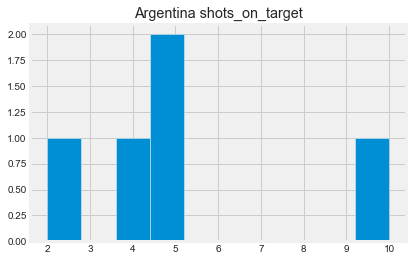

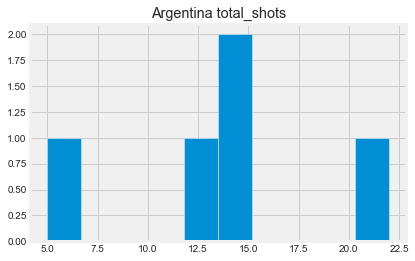

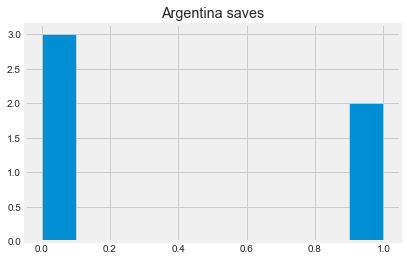

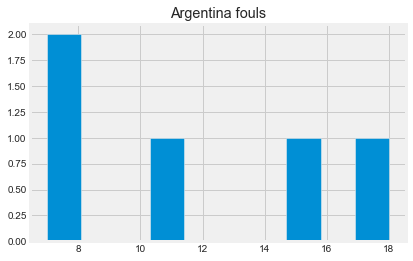

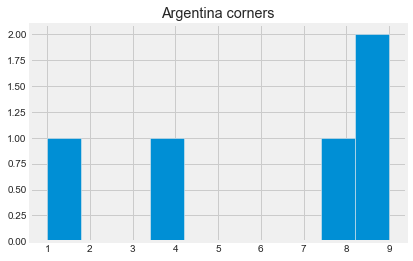

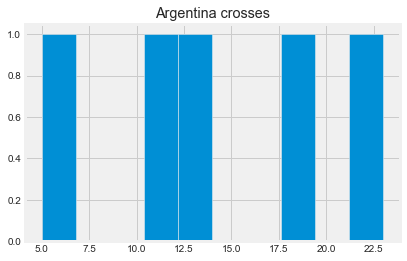

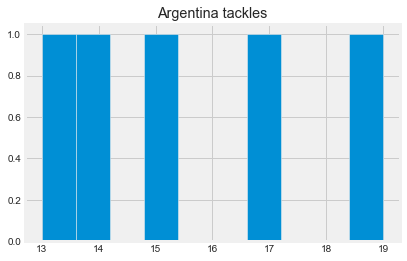

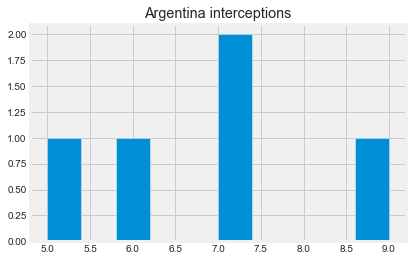

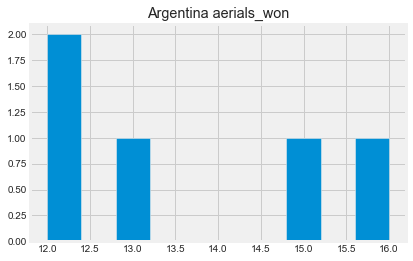

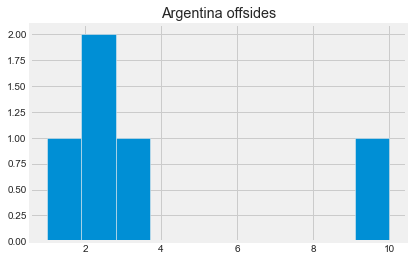

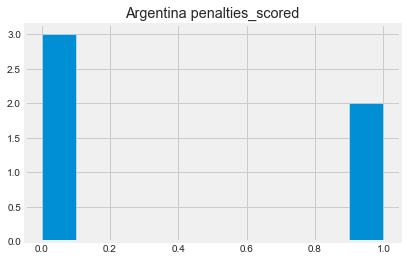

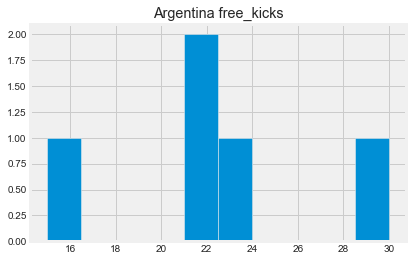

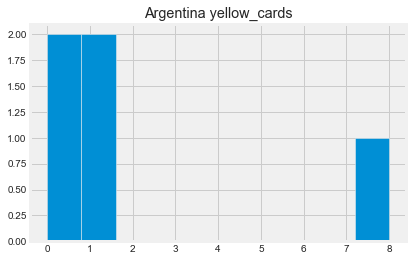

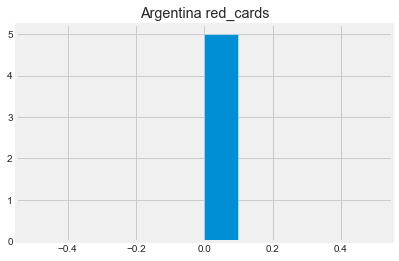

In [115]:
for column in num[2:]:
    plt.hist(df_argentina[column])
    plt.title("Argentina " + column)
    plt.show()

###### Нормальное распределение показателей заметно как у Аргентины, так и у Франции по показателям: possession, attempted_pases, shots_on_target, total_shots, interceptions, offsides и free kicks

##### Анализ количества и распределения отсутствующих значений

In [116]:
df_france

,team,score,is_win,date,attendance,possession,completed_passes,attempted_pases,shots_on_target,total_shots,...,corners,crosses,tackles,interceptions,aerials_won,offsides,penalties_scored,free_kicks,yellow_cards,red_cards
7,France,4-1,1,2022-11-22,40875,62,678,768,6,23,...,8,27,20,12,16,0,0,11,0,0
22,France,2-1,1,2022-11-26,42860,49,455,539,6,21,...,6,20,20,10,9,1,0,10,1,0
50,France,3-1,1,2022-12-04,40989,55,501,601,8,16,...,7,25,11,9,12,3,0,8,1,0
37,France,1-0,0,2022-11-30,43627,65,573,676,3,10,...,8,19,37,13,13,2,0,17,0,0
59,France,1-2,1,2022-12-10,68895,43,325,409,5,8,...,2,11,10,5,19,2,0,14,3,0


In [117]:
df_argentina

,team,score,is_win,date,attendance,possession,completed_passes,attempted_pases,shots_on_target,total_shots,...,corners,crosses,tackles,interceptions,aerials_won,offsides,penalties_scored,free_kicks,yellow_cards,red_cards
4,Argentina,1-2,0,2022-11-22,88012,69,546,659,5,14,...,9,23,17,9,16,10,1,22,0,0
23,Argentina,2-0,1,2022-11-26,88966,58,471,568,2,5,...,4,13,14,7,15,2,0,23,1,0
49,Argentina,2-1,1,2022-12-03,45032,60,635,729,5,14,...,1,5,15,7,13,3,0,15,0,0
39,Argentina,0-2,1,2022-11-30,44089,73,827,911,10,22,...,9,18,13,5,12,1,0,22,1,0
57,Argentina,(3) 2-2 (4),1,2022-12-09,88235,48,526,642,4,13,...,8,12,19,6,12,2,1,30,8,0


In [118]:
df_france.shape, df_argentina.shape

((5, 22), (5, 22))

In [119]:
df_france.dropna().count()

team                5
score               5
is_win              5
date                5
attendance          5
possession          5
completed_passes    5
attempted_pases     5
shots_on_target     5
total_shots         5
saves               5
fouls               5
corners             5
crosses             5
tackles             5
interceptions       5
aerials_won         5
offsides            5
penalties_scored    5
free_kicks          5
yellow_cards        5
red_cards           5
dtype: int64

In [120]:
df_argentina.dropna().count()

team                5
score               5
is_win              5
date                5
attendance          5
possession          5
completed_passes    5
attempted_pases     5
shots_on_target     5
total_shots         5
saves               5
fouls               5
corners             5
crosses             5
tackles             5
interceptions       5
aerials_won         5
offsides            5
penalties_scored    5
free_kicks          5
yellow_cards        5
red_cards           5
dtype: int64

##### Построение совместного распределения каждого признака и целевой переменной

In [121]:
df_full = df_france.append(df_argentina)
df_full

,team,score,is_win,date,attendance,possession,completed_passes,attempted_pases,shots_on_target,total_shots,...,corners,crosses,tackles,interceptions,aerials_won,offsides,penalties_scored,free_kicks,yellow_cards,red_cards
7,France,4-1,1,2022-11-22,40875,62,678,768,6,23,...,8,27,20,12,16,0,0,11,0,0
22,France,2-1,1,2022-11-26,42860,49,455,539,6,21,...,6,20,20,10,9,1,0,10,1,0
50,France,3-1,1,2022-12-04,40989,55,501,601,8,16,...,7,25,11,9,12,3,0,8,1,0
37,France,1-0,0,2022-11-30,43627,65,573,676,3,10,...,8,19,37,13,13,2,0,17,0,0
59,France,1-2,1,2022-12-10,68895,43,325,409,5,8,...,2,11,10,5,19,2,0,14,3,0
4,Argentina,1-2,0,2022-11-22,88012,69,546,659,5,14,...,9,23,17,9,16,10,1,22,0,0
23,Argentina,2-0,1,2022-11-26,88966,58,471,568,2,5,...,4,13,14,7,15,2,0,23,1,0
49,Argentina,2-1,1,2022-12-03,45032,60,635,729,5,14,...,1,5,15,7,13,3,0,15,0,0
39,Argentina,0-2,1,2022-11-30,44089,73,827,911,10,22,...,9,18,13,5,12,1,0,22,1,0
57,Argentina,(3) 2-2 (4),1,2022-12-09,88235,48,526,642,4,13,...,8,12,19,6,12,2,1,30,8,0


In [122]:
grouped_df = pd.DataFrame(df_full.groupby(['shots_on_target']).count())
grouped_df

,team,score,is_win,date,attendance,possession,completed_passes,attempted_pases,total_shots,saves,...,corners,crosses,tackles,interceptions,aerials_won,offsides,penalties_scored,free_kicks,yellow_cards,red_cards
shots_on_target,,,,,,,,,,,,,,,,,,,,,
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
6,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
8,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


##### Построение корреляционной матрицы

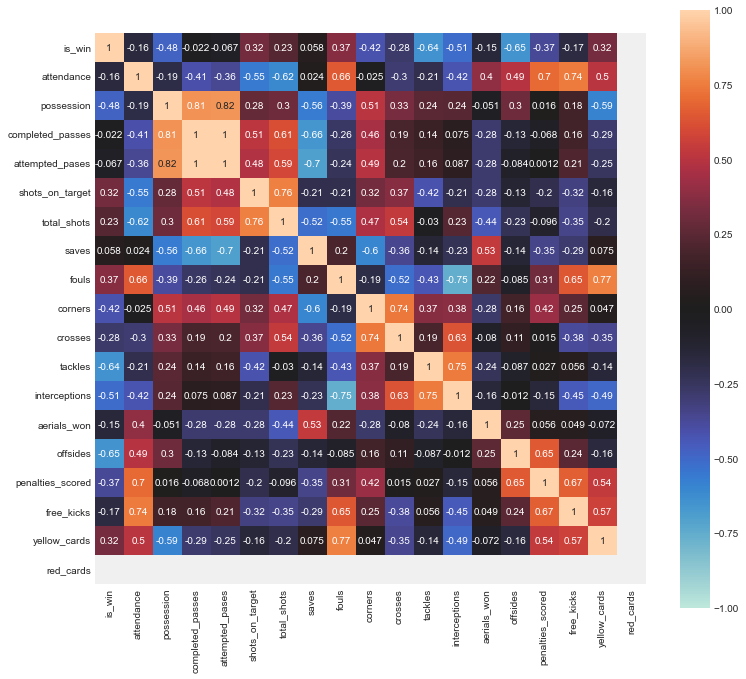

In [123]:
sns.heatmap(df_full.corr(), annot=True, vmin=-1, vmax=1, center=0, square=True).figure.set_size_inches(11, 11)

###### Для целевого признака shots_on_target тесную связь играют total_shots (общее число ударов) и completed_passes (число принятых пасов у команд), а отрицательную связь больше играет attendance (число болельщиков).

##### 4. Провести подготовительную обработку данных, включающую следующие шаги:
#####    - удаление или заполнение отсутствующих значений;
#####    - приведение всех признаков к бинарной либо числовой шкале;
#####    - удаление несущественных либо избыточных признаков;
#####    - другие необходимые действия в зависимости от набора данных и задачи (группировка, удаление аномалий, и др.).

In [146]:
fixed_df = df_full.copy()
columns = [col for col in fixed_df.columns[1:]]
fixed_df = fixed_df[columns]
fixed_df

,score,is_win,date,attendance,possession,completed_passes,attempted_pases,shots_on_target,total_shots,saves,...,corners,crosses,tackles,interceptions,aerials_won,offsides,penalties_scored,free_kicks,yellow_cards,red_cards
7,4-1,1,2022-11-22,40875,62,678,768,6,23,0,...,8,27,20,12,16,0,0,11,0,0
22,2-1,1,2022-11-26,42860,49,455,539,6,21,1,...,6,20,20,10,9,1,0,10,1,0
50,3-1,1,2022-12-04,40989,55,501,601,8,16,1,...,7,25,11,9,12,3,0,8,1,0
37,1-0,0,2022-11-30,43627,65,573,676,3,10,2,...,8,19,37,13,13,2,0,17,0,0
59,1-2,1,2022-12-10,68895,43,325,409,5,8,6,...,2,11,10,5,19,2,0,14,3,0
4,1-2,0,2022-11-22,88012,69,546,659,5,14,0,...,9,23,17,9,16,10,1,22,0,0
23,2-0,1,2022-11-26,88966,58,471,568,2,5,1,...,4,13,14,7,15,2,0,23,1,0
49,2-1,1,2022-12-03,45032,60,635,729,5,14,1,...,1,5,15,7,13,3,0,15,0,0
39,0-2,1,2022-11-30,44089,73,827,911,10,22,0,...,9,18,13,5,12,1,0,22,1,0
57,(3) 2-2 (4),1,2022-12-09,88235,48,526,642,4,13,0,...,8,12,19,6,12,2,1,30,8,0


##### Общий алгоритм

###### - Если фактор категориальный, то ставим значение моды по нему
###### - Если фактор числовой и ассиметрия достаточно большая, то можно взять среднее
###### - Если фактор числовой и ассиметрия не очень большая, то можно взять медиану
###### - Так как выборка достаточно большая, есть возможность удалить некоторые отсутствующие данные

In [147]:
for column in fixed_df.columns[4:]:
    print(f"Асимметрия признака {column} ==> {fixed_df[column].skew()}")

Асимметрия признака possession ==> -0.07969940106737994
Асимметрия признака completed_passes ==> 0.4950437495907124
Асимметрия признака attempted_pases ==> 0.2056747654874085
Асимметрия признака shots_on_target ==> 0.6601937677079547
Асимметрия признака total_shots ==> -0.007107807293178478
Асимметрия признака saves ==> 2.4254631029547404
Асимметрия признака fouls ==> 0.5201410184476537
Асимметрия признака corners ==> -0.9324100117304434
Асимметрия признака crosses ==> -0.3150919609749185
Асимметрия признака tackles ==> 1.9669683795897726
Асимметрия признака interceptions ==> 0.4577304643525135
Асимметрия признака aerials_won ==> 0.34399764528411725
Асимметрия признака offsides ==> 2.5105296549859615
Асимметрия признака penalties_scored ==> 1.7787811838447127
Асимметрия признака free_kicks ==> 0.448460908415822
Асимметрия признака yellow_cards ==> 2.4605967224360015
Асимметрия признака red_cards ==> 0


In [148]:
types_france, types_argentina = pd.Series(np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])), pd.Series(np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]))
fixed_df.insert(1, 'type_France', types_france)
fixed_df.insert(2, 'type_Argentina', types_argentina)
fixed_df

,score,type_France,type_Argentina,is_win,date,attendance,possession,completed_passes,attempted_pases,shots_on_target,...,corners,crosses,tackles,interceptions,aerials_won,offsides,penalties_scored,free_kicks,yellow_cards,red_cards
7,4-1,0.0,1.0,1,2022-11-22,40875,62,678,768,6,...,8,27,20,12,16,0,0,11,0,0
22,2-1,NaN,NaN,1,2022-11-26,42860,49,455,539,6,...,6,20,20,10,9,1,0,10,1,0
50,3-1,NaN,NaN,1,2022-12-04,40989,55,501,601,8,...,7,25,11,9,12,3,0,8,1,0
37,1-0,NaN,NaN,0,2022-11-30,43627,65,573,676,3,...,8,19,37,13,13,2,0,17,0,0
59,1-2,NaN,NaN,1,2022-12-10,68895,43,325,409,5,...,2,11,10,5,19,2,0,14,3,0
4,1-2,1.0,0.0,0,2022-11-22,88012,69,546,659,5,...,9,23,17,9,16,10,1,22,0,0
23,2-0,NaN,NaN,1,2022-11-26,88966,58,471,568,2,...,4,13,14,7,15,2,0,23,1,0
49,2-1,NaN,NaN,1,2022-12-03,45032,60,635,729,5,...,1,5,15,7,13,3,0,15,0,0
39,0-2,NaN,NaN,1,2022-11-30,44089,73,827,911,10,...,9,18,13,5,12,1,0,22,1,0
57,(3) 2-2 (4),NaN,NaN,1,2022-12-09,88235,48,526,642,4,...,8,12,19,6,12,2,1,30,8,0


In [149]:
fixed_df['type_France'] = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
fixed_df['type_Argentina'] = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
fixed_df

,score,type_France,type_Argentina,is_win,date,attendance,possession,completed_passes,attempted_pases,shots_on_target,...,corners,crosses,tackles,interceptions,aerials_won,offsides,penalties_scored,free_kicks,yellow_cards,red_cards
7,4-1,1,0,1,2022-11-22,40875,62,678,768,6,...,8,27,20,12,16,0,0,11,0,0
22,2-1,1,0,1,2022-11-26,42860,49,455,539,6,...,6,20,20,10,9,1,0,10,1,0
50,3-1,1,0,1,2022-12-04,40989,55,501,601,8,...,7,25,11,9,12,3,0,8,1,0
37,1-0,1,0,0,2022-11-30,43627,65,573,676,3,...,8,19,37,13,13,2,0,17,0,0
59,1-2,1,0,1,2022-12-10,68895,43,325,409,5,...,2,11,10,5,19,2,0,14,3,0
4,1-2,0,1,0,2022-11-22,88012,69,546,659,5,...,9,23,17,9,16,10,1,22,0,0
23,2-0,0,1,1,2022-11-26,88966,58,471,568,2,...,4,13,14,7,15,2,0,23,1,0
49,2-1,0,1,1,2022-12-03,45032,60,635,729,5,...,1,5,15,7,13,3,0,15,0,0
39,0-2,0,1,1,2022-11-30,44089,73,827,911,10,...,9,18,13,5,12,1,0,22,1,0
57,(3) 2-2 (4),0,1,1,2022-12-09,88235,48,526,642,4,...,8,12,19,6,12,2,1,30,8,0


In [150]:
# Формируем X и Y для дальнейшей передачи sklearn.model_selection.train_test_split
X = fixed_df.drop('shots_on_target', axis=1)
y = fixed_df['shots_on_target']
X

,score,type_France,type_Argentina,is_win,date,attendance,possession,completed_passes,attempted_pases,total_shots,...,corners,crosses,tackles,interceptions,aerials_won,offsides,penalties_scored,free_kicks,yellow_cards,red_cards
7,4-1,1,0,1,2022-11-22,40875,62,678,768,23,...,8,27,20,12,16,0,0,11,0,0
22,2-1,1,0,1,2022-11-26,42860,49,455,539,21,...,6,20,20,10,9,1,0,10,1,0
50,3-1,1,0,1,2022-12-04,40989,55,501,601,16,...,7,25,11,9,12,3,0,8,1,0
37,1-0,1,0,0,2022-11-30,43627,65,573,676,10,...,8,19,37,13,13,2,0,17,0,0
59,1-2,1,0,1,2022-12-10,68895,43,325,409,8,...,2,11,10,5,19,2,0,14,3,0
4,1-2,0,1,0,2022-11-22,88012,69,546,659,14,...,9,23,17,9,16,10,1,22,0,0
23,2-0,0,1,1,2022-11-26,88966,58,471,568,5,...,4,13,14,7,15,2,0,23,1,0
49,2-1,0,1,1,2022-12-03,45032,60,635,729,14,...,1,5,15,7,13,3,0,15,0,0
39,0-2,0,1,1,2022-11-30,44089,73,827,911,22,...,9,18,13,5,12,1,0,22,1,0
57,(3) 2-2 (4),0,1,1,2022-12-09,88235,48,526,642,13,...,8,12,19,6,12,2,1,30,8,0


In [152]:
y

7      6
22     6
50     8
37     3
59     5
4      5
23     2
49     5
39    10
57     4
Name: shots_on_target, dtype: int64

##### 5. Количественные характеристики датасета необходимо также привести после его обработки.

In [153]:
fixed_df

,score,type_France,type_Argentina,is_win,date,attendance,possession,completed_passes,attempted_pases,shots_on_target,...,corners,crosses,tackles,interceptions,aerials_won,offsides,penalties_scored,free_kicks,yellow_cards,red_cards
7,4-1,1,0,1,2022-11-22,40875,62,678,768,6,...,8,27,20,12,16,0,0,11,0,0
22,2-1,1,0,1,2022-11-26,42860,49,455,539,6,...,6,20,20,10,9,1,0,10,1,0
50,3-1,1,0,1,2022-12-04,40989,55,501,601,8,...,7,25,11,9,12,3,0,8,1,0
37,1-0,1,0,0,2022-11-30,43627,65,573,676,3,...,8,19,37,13,13,2,0,17,0,0
59,1-2,1,0,1,2022-12-10,68895,43,325,409,5,...,2,11,10,5,19,2,0,14,3,0
4,1-2,0,1,0,2022-11-22,88012,69,546,659,5,...,9,23,17,9,16,10,1,22,0,0
23,2-0,0,1,1,2022-11-26,88966,58,471,568,2,...,4,13,14,7,15,2,0,23,1,0
49,2-1,0,1,1,2022-12-03,45032,60,635,729,5,...,1,5,15,7,13,3,0,15,0,0
39,0-2,0,1,1,2022-11-30,44089,73,827,911,10,...,9,18,13,5,12,1,0,22,1,0
57,(3) 2-2 (4),0,1,1,2022-12-09,88235,48,526,642,4,...,8,12,19,6,12,2,1,30,8,0


In [154]:
fixed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 7 to 57
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   score             10 non-null     object        
 1   type_France       10 non-null     int64         
 2   type_Argentina    10 non-null     int64         
 3   is_win            10 non-null     int64         
 4   date              10 non-null     datetime64[ns]
 5   attendance        10 non-null     int64         
 6   possession        10 non-null     int64         
 7   completed_passes  10 non-null     int64         
 8   attempted_pases   10 non-null     int64         
 9   shots_on_target   10 non-null     int64         
 10  total_shots       10 non-null     int64         
 11  saves             10 non-null     int64         
 12  fouls             10 non-null     int64         
 13  corners           10 non-null     int64         
 14  crosses           10 non-nul

In [155]:
fixed_df.shape

(10, 23)

In [156]:
fixed_df.describe()

,type_France,type_Argentina,is_win,attendance,possession,completed_passes,attempted_pases,shots_on_target,total_shots,saves,...,corners,crosses,tackles,interceptions,aerials_won,offsides,penalties_scored,free_kicks,yellow_cards,red_cards
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.0
mean,0.500000,0.500000,0.800000,59158.000000,58.200000,553.700000,650.200000,5.400000,14.600000,1.200000,...,6.200000,17.300000,17.600000,8.300000,13.700000,2.60000,0.200000,17.200000,1.500000,0.0
std,0.527046,0.527046,0.421637,21754.149872,9.600926,137.280775,136.883405,2.319004,6.040603,1.813529,...,2.898275,6.945022,7.691265,2.790858,2.830391,2.75681,0.421637,6.941021,2.460804,0.0
min,0.000000,0.000000,0.000000,40875.000000,43.000000,325.000000,409.000000,2.000000,5.000000,0.000000,...,1.000000,5.000000,10.000000,5.000000,9.000000,0.00000,0.000000,8.000000,0.000000,0.0
25%,0.000000,0.000000,1.000000,43051.750000,50.500000,478.500000,576.250000,4.250000,10.750000,0.000000,...,4.500000,12.250000,13.250000,6.250000,12.000000,1.25000,0.000000,11.750000,0.000000,0.0
50%,0.500000,0.500000,1.000000,44560.500000,59.000000,536.000000,650.500000,5.000000,14.000000,1.000000,...,7.500000,18.500000,16.000000,8.000000,13.000000,2.00000,0.000000,16.000000,1.000000,0.0
75%,1.000000,1.000000,1.000000,83232.750000,64.250000,619.500000,715.750000,6.000000,19.750000,1.000000,...,8.000000,22.250000,19.750000,9.750000,15.750000,2.75000,0.000000,22.000000,1.000000,0.0
max,1.000000,1.000000,1.000000,88966.000000,73.000000,827.000000,911.000000,10.000000,23.000000,6.000000,...,9.000000,27.000000,37.000000,13.000000,19.000000,10.00000,1.000000,30.000000,8.000000,0.0
